# Exploratory Data Analysis

### Roles to Explore:

In [2]:
# importing libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mei\anaconda3\envs\clean_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for AUS Data Analyst roles

In [10]:
df_DA_aus = df[
    (df['job_country'] == 'Australia') &
    (df['job_title_short'] == 'Data Analyst')
]

### Job Locations to Explore

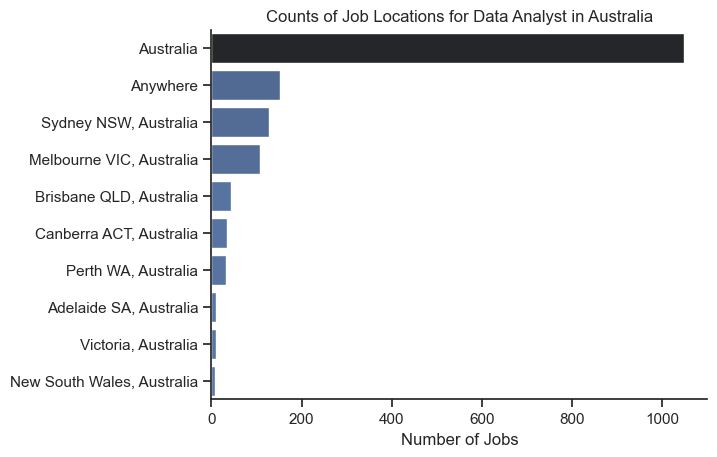

In [11]:
df_plot = df_DA_aus['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(
    data=df_plot,
    x='count',
    y='job_location',
    hue='count',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Australia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

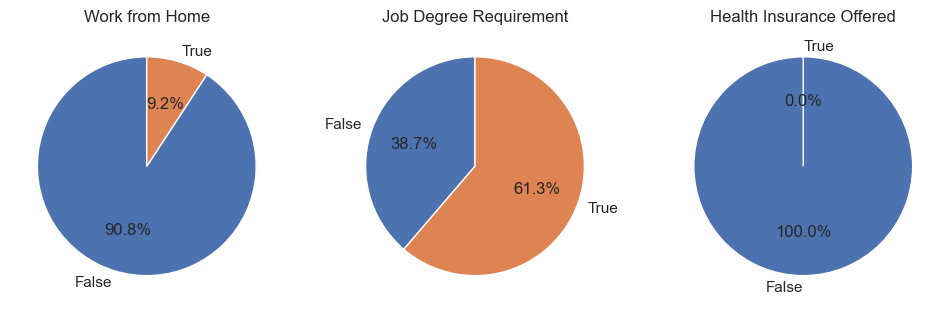

In [5]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df_DA_aus[column].value_counts().reindex([False, True], fill_value=0),
        startangle=90, 
        autopct='%1.1f%%',
        labels=['False','True']
        )
    ax[i].set_title(title)

plt.show()

### Companies to Explore

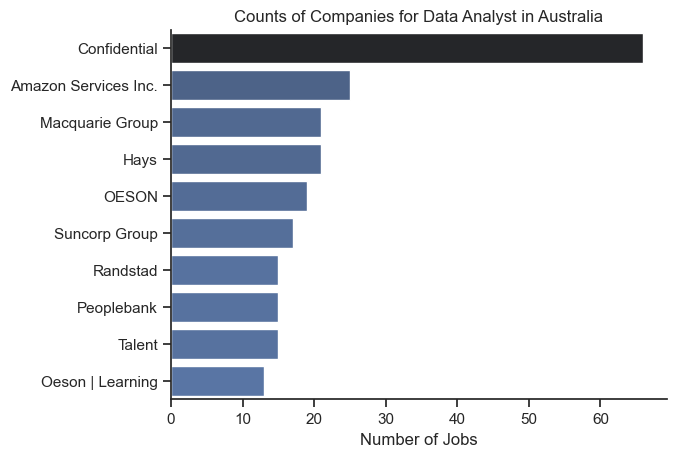

In [6]:
df_plot = df_DA_aus['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(
    data=df_plot,
    x='count',
    y='company_name',
    hue='count',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Counts of Companies for Data Analyst in Australia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()